In [1]:
import matplotlib.pyplot as plt
import numpy as np
from api.smithwilson import RiskFreeRates

In [2]:
sek_swap_20230531 = np.array([0.03955, 0.0363, 0.033716, 0.03193, 0.030886, 0.03019, 0.02976, 0.02944, 0.02924, 0.02917])

In [3]:
CRA = 0.001
maturities = np.array([2, 3, 5, 10])
rates = sek_swap_20230531[maturities - 1] - CRA
projection = np.arange(1, 151)
ufr = 0.0345
convergence_maturity = 20
tol = 1e-4

In [4]:
RFR = RiskFreeRates(rates, maturities, projection, ufr, convergence_maturity, tol, None)

In [5]:
alpha, r = RFR.result

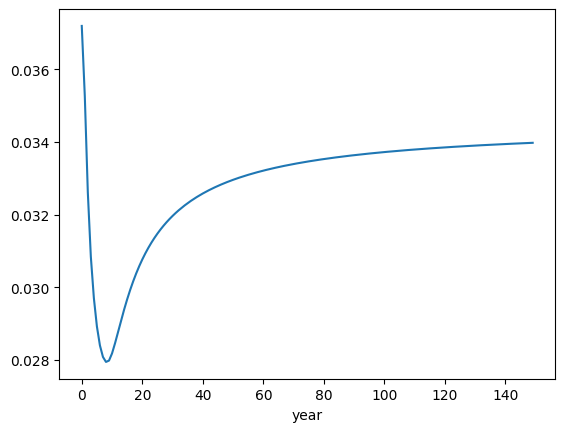

In [6]:
plt.plot(r)
plt.xlabel('year')
plt.show()

In [7]:
eiopa = np.genfromtxt('../Data/SE_31_5_2023_SWP_LLP_10_EXT_10_UFR_345.csv')

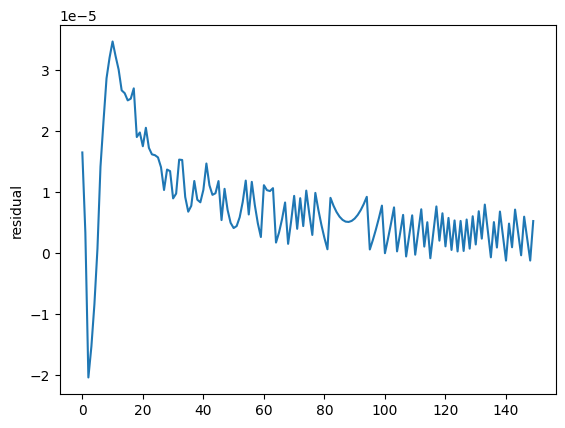

In [8]:
plt.plot(eiopa-r)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.ylabel('residual')
plt.show()

In [9]:
mse = (np.square(eiopa - r)).mean()

In [10]:
print(f'MSE: {mse}, alpha: {alpha}')

MSE: 1.2470797051797787e-10, alpha: 0.3919787961295073


With alpha from EIOPA

In [11]:
alpha0 = 0.391017

In [12]:
RFR_alpha = RiskFreeRates(rates, maturities, projection, ufr, convergence_maturity, tol, alpha0)

In [13]:
alpha2, r2 = RFR_alpha.result

In [14]:
mse2 = (np.square(eiopa - r2)).mean()

In [15]:
print(f'MSE: {mse2}, alpha: {alpha2}')

MSE: 1.3948885088805536e-10, alpha: 0.391017


Monthly projection

In [16]:
projection_monthly = np.arange(1, 151, 1/12).round(6)

In [17]:
RFR_monthly = RiskFreeRates(rates, maturities, projection_monthly, ufr, convergence_maturity, tol, None)

In [18]:
alpha_m, r_m = RFR_monthly.result

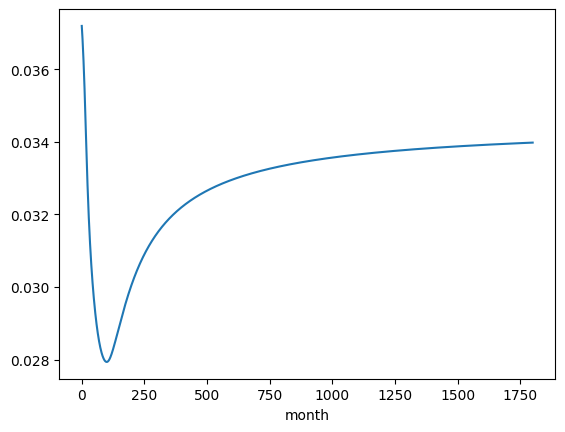

In [19]:
plt.plot(r_m)
plt.xlabel('month')
plt.show()

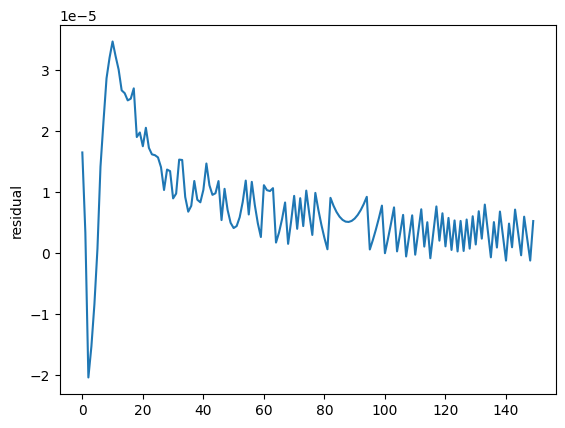

In [20]:
plt.plot(eiopa-r_m[::12])
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.ylabel('residual')
plt.show()

In [21]:
mse3 = (np.square(eiopa - r_m[::12])).mean()

In [22]:
print(f'MSE: {mse3}, alpha: {alpha_m}')

MSE: 1.247079705179743e-10, alpha: 0.3919787961295068
